In [21]:
import time
import numpy as np
import clipperpy
import matplotlib.pyplot as plt

In [22]:
def read_data_from_txt(txt_file):
    '''
    the txt file should be in the following format in each line:
    label x y z
    get the x y value return a 2 by n numpy array
    '''
    data = np.loadtxt(txt_file, usecols=(0, 1, 2), dtype=np.float64)
    return data.T

def visualize_DA(data_a, data_b, Ain, tf, displacement = 80):
    '''
    data_a: 3 by n numpy array, label, x, y lable range from 0 to -2
    data_b: 3 by m numpy array, label, x, y
    Ain: k by 2 numpy array, mapping point indexed by row in data_a to data_b
    '''
    # draw circles with label 0 in red, label -1 in blue, label -2 in green for data a
    data_a_position = data_a[1:3, :]
    transformed_back_data_b = transform_data(data_b, np.linalg.inv(tf))
    data_b_position = transformed_back_data_b[1:3, :]
    # for each point in data a, draw a line to the corresponding point in data b
    for i in range(Ain.shape[0]):
        a = data_a_position[:, Ain[i, 0]]
        b = data_b_position[:, Ain[i, 1]]
        plt.plot([a[0], b[0]+ displacement] , [a[1], b[1]], 'k-')
    for i in range(data_a_position.shape[1]):
        if data_a[0, i] == 3 or data_a[0, i] == 2:
            plt.plot(data_a_position[0, i], data_a_position[1, i], 'go')
        elif data_a[0, i] == 1:
            plt.plot(data_a_position[0, i], data_a_position[1, i], 'gs')
        elif data_a[0, i] == 0:
            plt.plot(data_a_position[0, i], data_a_position[1, i], 'go')
    for i in range(data_b_position.shape[1]):
        if data_b[0, i] == 3 or data_b[0, i] == 2:
            plt.plot(data_b_position[0, i] + displacement, data_b_position[1, i], 'ro')
        elif data_b[0, i] == 1:
            plt.plot(data_b_position[0, i] + displacement, data_b_position[1, i], 'rs')
        elif data_b[0, i] == 0:
            plt.plot(data_b_position[0, i] + displacement, data_b_position[1, i], 'ro')

    
    plt.show()

def transform_data(data, tf):
    '''
    data: 3 by n numpy array, label, x, y
    tf: 3 by 3 numpy array, 2D transformation matrix
    return data_transformed: 3 by n numpy array, label, x, y
    '''
    data_transformed = np.zeros_like(data)
    data_transformed[0, :] = data[0, :]
    data_xy = data[1:3, :]
    data_xy1 = np.vstack((data_xy, np.ones(data_xy.shape[1]))).T
    data_xy1_transformed = data_xy1 @ tf # n by 3
    data_xy_transformed = data_xy1_transformed[:, 0:2].T # 2 by n
    data_transformed[1:3, :] = data_xy_transformed
    return data_transformed

def visualize_data_a(data):
    '''
    data: 3 by n numpy array, label, x, y
    '''
    data_position = data[1:3, :]
    data_label = data[0, :]
    for i in range(data_position.shape[1]):
        if data_label[i] == 3 or data_label[i] == 2:
            plt.plot(data_position[0, i], data_position[1, i], 'go')
        elif data_label[i] == 1:
            plt.plot(data_position[0, i], data_position[1, i], 'gs')
        elif data_label[i] == 0:
            plt.plot(data_position[0, i], data_position[1, i], 'go')
    plt.show()

def visualize_data_b(data):
    '''
    data: 3 by n numpy array, label, x, y
    '''
    data_position = data[1:3, :]
    data_label = data[0, :]
    for i in range(data_position.shape[1]):
        if data_label[i] == 3 or data_label[i] == 2:
            plt.plot(data_position[0, i], data_position[1, i], 'ro')
        elif data_label[i] == 1:
            plt.plot(data_position[0, i], data_position[1, i], 'rs')
        elif data_label[i] == 0:
            plt.plot(data_position[0, i], data_position[1, i], 'ro')
    plt.show()
    

def generate_DA(size_a, size_b):
    '''
    size_a: number of points in data A
    size_b: number of points in data B
    A: min(size_a, size_b) by 2 numpy array, mapping point indexed by row in data A to data B 
    '''
    DA = np.zeros((size_a*size_b, 2), dtype=np.int32)
    for i in range(size_a):
        for j in range(size_b):
            DA[i*size_b+j, 0] = i
            DA[i*size_b+j, 1] = j
    return DA

def generate_DA_closest(size_a, size_b, data_a, data_b):
    '''
    size_a: number of points in data A
    size_b: number of points in data B
    data_a: 3 by size_a numpy array, label, x, y
    data_b: 3 by size_b numpy array, label, x, y
    A: min(size_a, size_b) by 2 numpy array, mapping point indexed by row in data A to data B 
    '''
    DA = []
    min_distance = 30
    for i in range(size_a):
        for j in range(size_b):
            distance = np.linalg.norm(data_a[1:3, i] - data_b[1:3, j])
            if distance < min_distance:
                DA.append([i, j])
    DA = np.array(DA, dtype=np.int32)
    return DA

def perturb_data(data, Transformation):
    '''
    data: 3 by n numpy array, label, x, y
    Transformation: 3 by 3 numpy array, 2D transformation matrix
    return data_perturbed: 3 by n numpy array, label, x, y
    '''
    data_perturbed = np.zeros_like(data)
    data_perturbed[0, :] = data[0, :]
    data_xy = data[1:3, :]
    data_xy1 = np.vstack((data_xy, np.ones(data_xy.shape[1]))).T
    data_xy1_perturbed = data_xy1 @ Transformation # n by 3
    data_xy_perturbed = data_xy1_perturbed[:, 0:2].T # 2 by n
    data_perturbed[1:3, :] = data_xy_perturbed
    return data_perturbed

def generate_2d_txt_file(txt_file):
    '''
    txt_data: 3 by n numpy array, label, x, y, z
    add a coma between x and y
    '''
    data = np.loadtxt(txt_file, usecols=(1, 2), dtype=np.float64)
    new_txt_file = txt_file.replace('.txt', '_2d.txt')
    np.savetxt(new_txt_file, data, fmt='%f', delimiter=',')
    


In [23]:
# data1_file = "/home/jiuzhou/clipper_semantic_object/examples/data/robot0Map_indoor.txt"
# data2_file = "/home/jiuzhou/clipper_semantic_object/examples/data/robot1Map_indoor.txt"
data1_file = "/home/jiuzhou/clipper_semantic_object/examples/data/robot0Map_forest.txt"
data2_file = "/home/jiuzhou/clipper_semantic_object/examples/data/robot1Map_forest.txt"
# data1_file = "/home/jiuzhou/clipper_semantic_object/examples/data/robot0Map_parking.txt"
# data2_file = "/home/jiuzhou/clipper_semantic_object/examples/data/robot1Map_parking.txt"

D1 = read_data_from_txt(data1_file)
D2 = read_data_from_txt(data2_file)
yaw = 0
dx = 0
dy = 0
perturb_tf = np.array([[np.cos(yaw), -np.sin(yaw), dx], [np.sin(yaw), np.cos(yaw), dy], [0, 0, 1]])
# data2 in data1's frame
gt_yaw = 0
gt_dx = 0
gt_dy = 0
gt_tf = np.array([[np.cos(gt_yaw), -np.sin(gt_yaw), gt_dx], [np.sin(gt_yaw), np.cos(gt_yaw), gt_dy], [0, 0, 1]])

D2 = perturb_data(D2, perturb_tf)
D2_ground_truth = perturb_data(D2, np.linalg.inv(gt_tf))
print(D1.shape)
print(D2.shape)
D1_position = D1[1:3, :]
D2_position = D2[1:3, :]
A = generate_DA(D1.shape[1], D2.shape[1])
# A = generate_DA_closest(D1.shape[1], D2.shape[1], D1, D2)
print(A.shape)


(3, 365)
(3, 284)
(6350, 2)


In [ ]:
generate_2d_txt_file(data1_file)
generate_2d_txt_file(data2_file)

In [24]:
# data association from gui's algorithm
# D1_position = np.load('/home/jiuzhou/sloam_ws/src/urquhart/example/data1.npy')
# D2_position = np.load('/home/jiuzhou/sloam_ws/src/urquhart/example/data2.npy')
# # change dtype to float64
# D1_position = D1_position.astype(np.float64).T
# D2_position = D2_position.astype(np.float64).T
# print(D1_position.shape)
# print(D2_position.shape)
# A_col1 = np.arange(D1_position.shape[1], dtype=np.int32)
# A_col2 = np.arange(D2_position.shape[1], dtype=np.int32)
# A = np.vstack((A_col1, A_col2)).T
# print(A.shape)

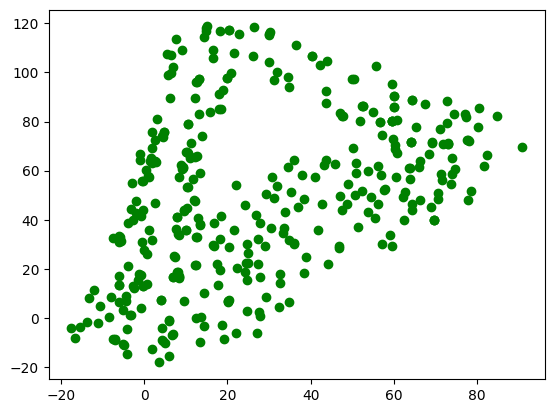

In [25]:
visualize_data_a(D1)

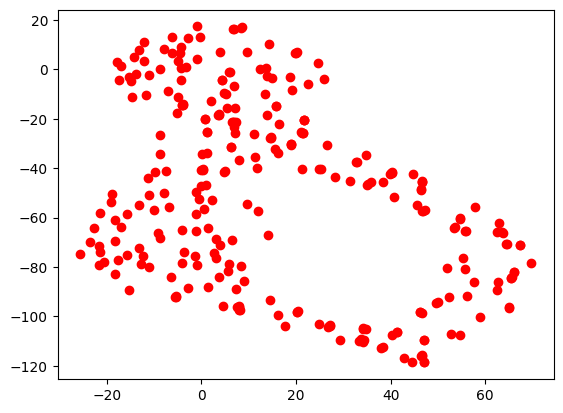

In [26]:
visualize_data_b(D2)

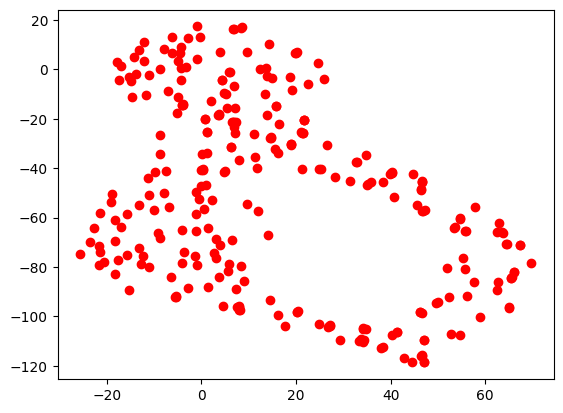

In [27]:
visualize_data_b(D2_ground_truth)

In [28]:
iparams = clipperpy.invariants.EuclideanDistanceParams()
iparams.sigma = 0.1
iparams.epsilon = 0.3
invariant = clipperpy.invariants.EuclideanDistance(iparams)

params = clipperpy.Params()
params.rounding = clipperpy.Rounding.DSD_HEU
clipper = clipperpy.CLIPPER(invariant, params)

perform matching on subset of large dataset 

In [ ]:
def generate_subset(points, window_size = 40):
    '''
    points: 2 by n numpy array
    return subset: a list of 2 by m numpy array
    '''
    margin = (x_range[1] - x_range[0]) / 20
    x_range = [np.min(points[0, :])-margin, np.max(points[0, :])+margin]
    y_range = [np.min(points[1, :])-margin, np.max(points[1, :])+margin]
    print(x_range)
    print(y_range)
    x_arange = np.arange(x_range[0], x_range[1], window_size)
    y_arange = np.arange(y_range[0], y_range[1], window_size)
    print(x_arange)
    print(y_arange)
    subset = []
    for i in range(len(x_arange)-1):
        for j in range(len(y_arange)-1):
            x_min = x_arange[i]
            x_max = x_arange[i+1]
            y_min = y_arange[j]
            y_max = y_arange[j+1]
            mask = np.logical_and(np.logical_and(points[0, :] >= x_min, points[0, :] <= x_max), np.logical_and(points[1, :] >= y_min, points[1, :] <= y_max))
            subset.append(points[:, mask])
    return subset

In [ ]:
subsets1 = generate_subset(D1_position)
subsets2 = generate_subset(D2_position)
t0 = time.perf_counter()
Ain_results = []
matched_points_a = []
matched_points_b = []
for i in range(len(subsets1)):
    for j in range(len(subsets2)):
        print(subsets1[i].shape)
        print(subsets2[j].shape)
        clipper = clipperpy.CLIPPER(invariant, params)
        A = generate_DA(subsets1[i].shape[1], subsets2[j].shape[1])
        print("total A size",A.shape)
        clipper.score_pairwise_consistency(subsets1[i],subsets2[j],A)
        clipper.solve()
        Ain = clipper.get_selected_associations()
        print("inliers size", Ain.shape)
        Ain_results.append(Ain)
        matched_points_a.append(subsets1[i][:, Ain[:, 0]])
        matched_points_b.append(subsets2[j][:, Ain[:, 1]])

t1 = time.perf_counter()
print("Time elapsed: ", t1-t0)

In [29]:
# t0 = time.perf_counter()
# # D1 3 by n
# # D2 3 by m
# # A: k by 2
# clipper.score_pairwise_consistency(D1_position, D2_position, A)
# t1 = time.perf_counter()
# print(f"Affinity matrix creation took {t1-t0:.3f} seconds")

# t0 = time.perf_counter()
# clipper.solve()
# t1 = time.perf_counter()

# # A = clipper.get_initial_associations()
# # Ain: k by 2 association
# Ain = clipper.get_selected_associations()

Affinity matrix creation took 11.066 seconds


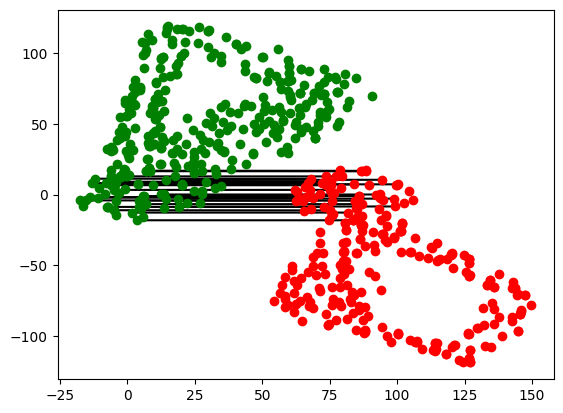

In [30]:
visualize_DA(D1, D2, Ain, gt_tf)

In [31]:
def tf_estimation_lsq(matched_points_a, matched_points_b):
    '''
    matched_points_a: 2 by n numpy array, x, y
    matched_points_b: 2 by n numpy array, x, y
    '''
    tf = np.eye(3)
    centroid_a = np.mean(matched_points_a, axis=1)
    centroid_b = np.mean(matched_points_b, axis=1)
    H = np.zeros((2, 2))
    for i in range(matched_points_a.shape[1]):
        H += np.outer(matched_points_a[:, i] - centroid_a, matched_points_b[:, i] - centroid_b)
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T
    if np.linalg.det(R) < 0:
        Vt[1, :] *= -1
        R = Vt.T @ U.T
    t = -R @ centroid_a + centroid_b
    tf[0:2, 0:2] = R
    tf[0:2, 2] = t
    return tf

def visualize_matched_points(matched_points_a, matched_points_b, displacement = 80):
    plt.plot(matched_points_a[0, :], matched_points_a[1, :], 'go')
    plt.plot(matched_points_b[0, :]+displacement, matched_points_b[1, :], 'ro')
    plt.show()

(2, 26)
(2, 26)
[[ 0.99997912 -0.00646281 -0.01349003]
 [ 0.00646281  0.99997912 -0.04043677]
 [ 0.          0.          1.        ]]


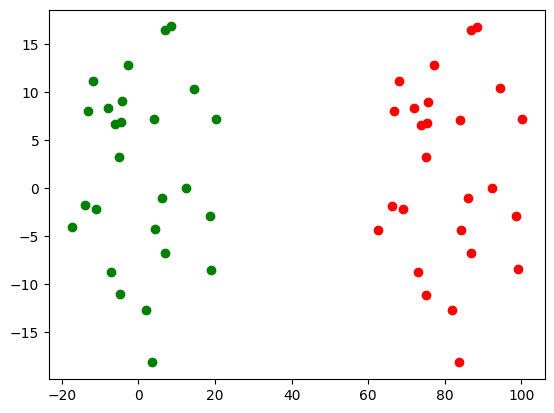

In [32]:
# use least square to estimate the transformation
matched_points_a = D1_position[:, Ain[:, 0]]
matched_points_b = D2_position[:, Ain[:, 1]]
print(matched_points_a.shape)
print(matched_points_b.shape)
tf_estimated = tf_estimation_lsq(matched_points_a, matched_points_b)
print(tf_estimated)
visualize_matched_points(matched_points_a, matched_points_b)
